# Load the data

In [2]:
# Import necessary packages
using DrWatson
using JLD2

# Activate the project environment
@quickactivate :FlowComplexity

# Define the file path
file_path = joinpath("./data/sims/000100", "simulation.jld2")

# Load the data from the specified file
@load file_path sim

1-element Vector{Symbol}:
 :sim

In [3]:
using CSV, DataFrames

graph_df = CSV.read("./data/sims/000100/graph.csv", DataFrame)

Row,destinations,source_inflow,sources
,Int64,Bool,Int64
1,2,true,1
2,4,true,1
3,3,false,2
4,5,false,2
5,6,false,3
6,5,false,4
7,7,false,4
8,6,false,5
9,8,false,5


In [4]:
using Graphs
using DataFrames

# Function to reconstruct a graph from edge lists
function reconstruct_graph(sources::Vector{Int}, destinations::Vector{Int})
    # Ensure the sources and destinations vectors have the same length
    if length(sources) != length(destinations)
        throw(ArgumentError("Sources and destinations must have the same length"))
    end

    # Find the number of unique nodes
    nodes = unique(vcat(sources, destinations))
    num_nodes = maximum(nodes)

    # Create an empty graph with the required number of nodes
    g = SimpleDiGraph(num_nodes)

    # Add edges to the graph
    for (src, dest) in zip(sources, destinations)
        add_edge!(g, src, dest)
    end

    return g
end

# Example usage
# sources = [1, 2, 3, 4]
sources = graph_df[:, "sources"]
# destinations = [2, 3, 4, 1]
destinations = graph_df[:, "destinations"]

graph = reconstruct_graph(sources, destinations)

# Print the graph
println(graph)

SimpleDiGraph{Int64}(12, [[2, 4], [3, 5], [6], [5, 7], [6, 8], [9], [8], [9], Int64[]], [Int64[], [1], [2], [1], [2, 4], [3, 5], [4], [5, 7], [6, 8]])


In [8]:
import Pkg; Pkg.add("GraphPlot")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed IterTools ─ v1.10.0
   Installed Compose ─── v0.9.5
   Installed GraphPlot ─ v0.6.0
    Updating `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Project.toml`
  [a2cc645c] + GraphPlot v0.6.0
    Updating `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Manifest.toml`
  [a81c6b42] + Compose v0.9.5
  [a2cc645c] + GraphPlot v0.6.0
  [c8e1da08] + IterTools v1.10.0
Precompiling project...
  ✓ IterTools
  ✓ Compose
  ✓ GraphPlot
  3 dependencies successfully precompiled in 4 seconds. 224 already precompiled.


In [10]:
import Pkg; Pkg.add("Colors")

   Resolving package versions...
    Updating `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Project.toml`
  [5ae59095] + Colors v0.12.11
  No Changes to `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Manifest.toml`


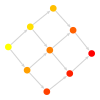

In [5]:
using Graphs
using GraphPlot
using Colors

# Plot the graph
gplot(graph, nodefillc=range(colorant"yellow", stop=colorant"red", length=nv(graph)))

on veut la moyenne du assembly index (ou juste des integers) pour chacun des chemostats, en fonction de la distance from source

In [6]:
using CSV, DataFrames

nreact = 9

timeseries_df = CSV.read("./data/sims/000100/timeseries.csv", DataFrame)
t500_df = filter(row -> row[:time] == 500, timeseries_df)
# display(t500_df)

int_avg_arr = []

for i in 1:nreact
    react_df = filter(row -> row[:reactor] == i, t500_df)
    
    int_avg = 0
    for row in eachrow(react_df)
        int_avg += row.variable * row.value
    end
    int_avg = int_avg / sum(react_df.value)

    push!(int_avg_arr, int_avg)
end

println(int_avg_arr)

Any[13.591068301225919, 15.94083969465649, 9.008676789587852, 17.508982035928145, 17.479666319082376, 16.87231968810916, 8.457609805924413, 15.92360430950049, 27.857522123893805]


In [7]:
dijkstra_result = dijkstra_shortest_paths(graph, 1)

dist = []
for i in 1:9
    shortest_distance = dijkstra_result.dists[i]
    push!(dist, shortest_distance)
end

println(dist)

Any[0, 1, 2, 1, 2, 3, 2, 3, 4]


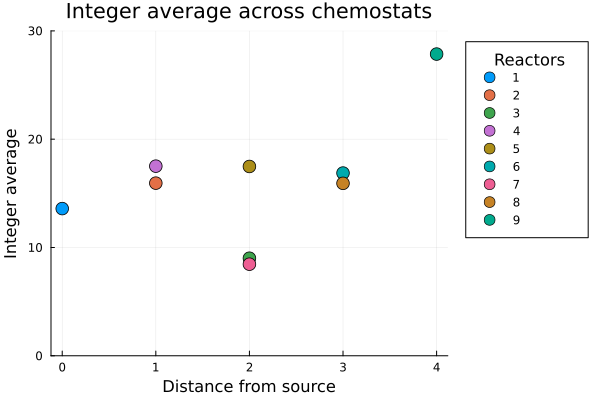

In [27]:
using Plots

s = scatter(title="Integer average across chemostats", legendtitle="Reactors", legend=:outertopright)

for i in 1:9
    scatter!(s, [dist[i]], [int_avg_arr[i]], xlabel="Distance from source", ylabel="Integer average", label="$i", markersize=7, ylim=(0,30))
end

display(s)